# Understanding PyTorch `nn.Linear`

PyTorch’s `nn.Linear` is a fundamental layer used to create **fully connected (dense) layers** in neural networks. This layer applies a **linear transformation** to the incoming data:

![Alt text](../../../assests//formulas//LinearLayer.PNG)

---

## What Is a Linear Layer?

A linear (or fully connected) layer takes a vector of inputs and transforms it into a new vector of outputs by applying a **learnable weight matrix and bias vector**.

```python
nn.Linear(in_features, out_features)
```

---


### `nn.Linear` Arguments

| Argument     | Type | Description                                 |
|--------------|------|---------------------------------------------|
| `in_features`  | int  | Size of each input sample                  |
| `out_features` | int  | Size of each output sample                 |
| `bias`         | bool | If `False`, the layer will not learn an additive bias |

---


# Linearly Seprable Data

## Sample Data:

- Class 0 around (1,1)
- Class 1 around (5,5)

---

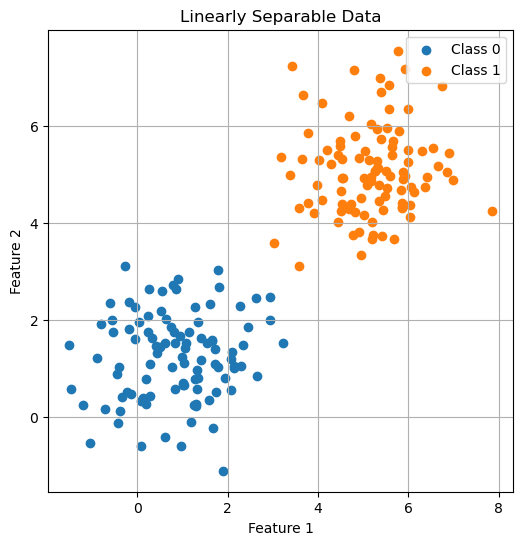

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)

n_samples=100

class0= torch.randn(n_samples,2)+torch.tensor([1,1])
class1=torch.randn(n_samples,2)+torch.tensor([5,5])

X = torch.cat([class0,class1],dim=0)
y = torch.cat([torch.zeros(n_samples),torch.ones(n_samples)]).unsqueeze(1)

plt.figure(figsize=(6,6))
plt.scatter(class0[:,0],class0[:,1],label="Class 0")
plt.scatter(class1[:,0],class1[:,1],label="Class 1")
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [18]:

class LinearClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)  

    def forward(self, x):
        return torch.sigmoid(self.linear(x)) 

In [19]:

model = LinearClassifier()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 100
for epoch in range(epochs):
 
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            predicted = (outputs > 0.5).float()
            accuracy = (predicted == y).float().mean()
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")


Epoch [10/100], Loss: 0.4190, Accuracy: 0.7550
Epoch [20/100], Loss: 0.3761, Accuracy: 0.8300
Epoch [30/100], Loss: 0.3418, Accuracy: 0.9050
Epoch [40/100], Loss: 0.3141, Accuracy: 0.9300
Epoch [50/100], Loss: 0.2912, Accuracy: 0.9500
Epoch [60/100], Loss: 0.2719, Accuracy: 0.9600
Epoch [70/100], Loss: 0.2555, Accuracy: 0.9600
Epoch [80/100], Loss: 0.2412, Accuracy: 0.9600
Epoch [90/100], Loss: 0.2287, Accuracy: 0.9600
Epoch [100/100], Loss: 0.2176, Accuracy: 0.9650


In [20]:
for x,j in model.named_parameters():
    print(x,':',j.shape)

linear.weight : torch.Size([1, 2])
linear.bias : torch.Size([1])


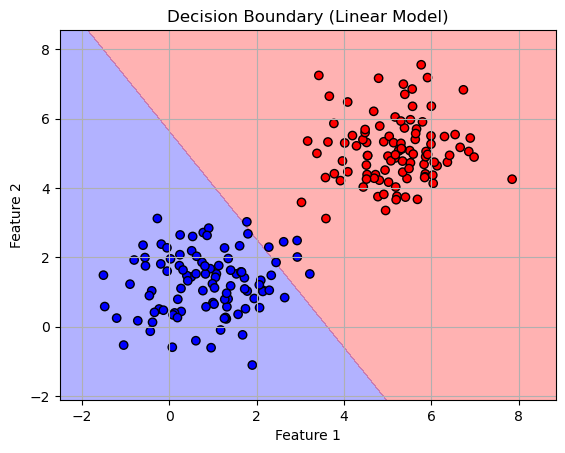

In [21]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100),
                            torch.linspace(y_min, y_max, 100), indexing='ij')
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="bwr", edgecolor="k")
    plt.title("Decision Boundary (Linear Model)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X, y)